In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [2]:
# load negative reviews 
df_neg = pd.read_fwf('Data/MovieSentiment/rt-polarity.neg',
                     header=None,
                     names=['movie_review','sentiment'])
df_neg['sentiment'] = 'neg'
print(df_neg.shape)
df_neg.head()

(5331, 2)


,movie_review,sentiment
0,"simplistic , silly and tedious .",neg
1,"it's so laddish and juvenile , only teenage bo...",neg
2,exploitative and largely devoid of the depth o...,neg
3,[garbus] discards the potential for pathologic...,neg
4,a visually flashy but narratively opaque and e...,neg


In [3]:
# load positive reviews
df_pos = pd.read_fwf('Data/MovieSentiment/rt-polarity.pos',
                     header=None,
                     names=['movie_review','sentiment'])
df_pos['sentiment'] = 'pos'
print(df_pos.shape)
df_pos.head()

(5331, 2)


,movie_review,sentiment
0,the rock is destined to be the 21st century's ...,pos
1,"the gorgeously elaborate continuation of "" the...",pos
2,effective but too-tepid biopic,pos
3,if you sometimes like to go to the movies to h...,pos
4,"emerges as something rare , an issue movie tha...",pos


In [4]:
# concatenate negative and positive reviews,randomize order and reset index
df = pd.concat([df_neg,df_pos]).sample(frac=1.0,random_state=0).reset_index(drop=True)
df.sentiment = df.sentiment.astype('category')
print(df.shape)
df.head()

(10662, 2)


,movie_review,sentiment
0,the sentimental cliches mar an otherwise excel...,pos
1,"if you love the music , and i do , its hard to...",pos
2,"though harris is affecting at times , he canno...",neg
3,poignant japanese epic about adolescent anomie...,pos
4,"cantet perfectly captures the hotel lobbies , ...",pos


In [5]:
# print first 10 reviews
for ix in range(10):
    print(df.movie_review[ix])
    print('----------')
    print(df.sentiment[ix])
    print()

the sentimental cliches mar an otherwise excellent film . a powerful performance from mel gibson and a brutal 90-minute battle sequence that does everything but issue you a dog-tag and an m-16 .
----------
pos

if you love the music , and i do , its hard to imagine having more fun watching a documentary . . .
----------
pos

though harris is affecting at times , he cannot overcome the sense that pumpkin is a mere plot pawn for two directors with far less endearing disabilities .
----------
neg

poignant japanese epic about adolescent anomie and heartbreak .
----------
pos

cantet perfectly captures the hotel lobbies , two-lane highways , and roadside cafes that permeate vincent's days
----------
pos

'unfaithful' cheats on itself and retreats to comfortable territory . too bad .
----------
neg

superior genre storytelling , which gets under our skin simply by crossing the nuclear line .
----------
pos

as a director , paxton is surprisingly brilliant , deftly sewing together what could

In [6]:
df.shape

(10662, 2)

In [7]:
df.values

array([['the sentimental cliches mar an otherwise excellent film . a powerful performance from mel gibson and a brutal 90-minute battle sequence that does everything but issue you a dog-tag and an m-16 .',
        'pos'],
       ['if you love the music , and i do , its hard to imagine having more fun watching a documentary . . .',
        'pos'],
       ['though harris is affecting at times , he cannot overcome the sense that pumpkin is a mere plot pawn for two directors with far less endearing disabilities .',
        'neg'],
       ...,
       ['high drama , disney-style - a wing and a prayer and a hunky has-been pursuing his castle in the sky .',
        'neg'],
       ['jaunty fun , with its celeb-strewn backdrop well used .', 'pos'],
       ["the film's bathos often overwhelms what could have been a more multifaceted look at this interesting time and place .",
        'neg']], dtype=object)

In [8]:
df.values.flatten()

array(['the sentimental cliches mar an otherwise excellent film . a powerful performance from mel gibson and a brutal 90-minute battle sequence that does everything but issue you a dog-tag and an m-16 .',
       'pos',
       'if you love the music , and i do , its hard to imagine having more fun watching a documentary . . .',
       ..., 'pos',
       "the film's bathos often overwhelms what could have been a more multifaceted look at this interesting time and place .",
       'neg'], dtype=object)

In [9]:
vectorizer = TfidfVectorizer(analyzer='word',stop_words='english',ngram_range=(1,3))
tfidf = vectorizer.fit_transform(df['movie_review'])
vocabulary = vectorizer.get_feature_names()

In [10]:
attributes = tfidf
target = df['sentiment']

In [11]:
#attributes
len(vocabulary)
#attributes.shape[1]

183646

In [12]:
hparam = {'alpha': np.linspace(0,2,200)}
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes, param_grid=hparam, return_train_score=True)
NBayesCV.fit(attributes, target)

C:\Users\chenx16\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\chenx16\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\chenx16\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\chenx16\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\chenx16\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will r

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': array([0.        , 0.01005025, 0.0201005 , 0.03015075, 0.04020101,
       0.05025126, 0.06030151, 0.07035176, 0.08040201, 0.09045226,
       0.10050251, 0.11055276, 0.12060302, 0.13065327, 0.14070352,
       0.15075377, 0.16080402, 0.17085427, 0.18090452, 0.19095477,
       0.20100503, 0.21105528, 0.22110553, 0.23115578, 0.24120603,
       0.25125628, 0.26130...
       1.65829146, 1.66834171, 1.67839196, 1.68844221, 1.69849246,
       1.70854271, 1.71859296, 1.72864322, 1.73869347, 1.74874372,
       1.75879397, 1.76884422, 1.77889447, 1.78894472, 1.79899497,
       1.80904523, 1.81909548, 1.82914573, 1.83919598, 1.84924623,
       1.85929648, 1.86934673, 1.87939698, 1.88944724, 1.89949749,
       1.90954774, 1.91959799, 1.92964824, 1.93969849, 1.94974874,
       1.95979899, 1.96984925, 1.9798995 , 1.98994975, 2.        ])},
             return_train_score=True)

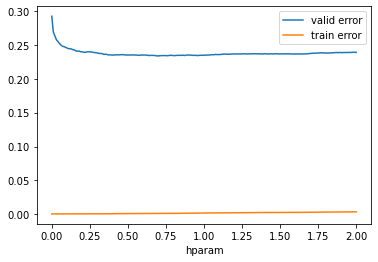

In [13]:
results_NB = pd.DataFrame()
results_NB['hparam'] = hparam['alpha']
results_NB['valid error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results_NB['train error'] = 1 - NBayesCV.cv_results_['mean_train_score']
results_NB = results_NB.set_index('hparam', drop=True)
results_NB.plot(kind='line')

In [14]:
NBayesCV.best_params_

{'alpha': 0.6934673366834171}

In [15]:
NBayesCV.best_score_

0.7665548263726714

In [16]:
# baseline
round(1 - df['sentiment'].value_counts().max() / df.shape[0],3)

0.5

In [17]:
# print lowest test error rate
error_test = 1 - NBayesCV.best_score_
print('Naive Bayes:vvalidation error rate =',round(error_test,3))

Naive Bayes:vvalidation error rate = 0.233


In [18]:
# print training error rate
alpha = NBayesCV.best_params_['alpha']
NBayes = MultinomialNB(alpha=alpha)
NBayes.fit(attributes,target)
error_valid = 1 - NBayes.score(attributes,target)
print('Naive Bayes: training error rate =',round(error_valid,3))

Naive Bayes: training error rate = 0.002
